In [1]:
import os 
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
from pyarrow import feather

#move up in directory
os.chdir('../')
# os.getcwd()

In [2]:
from helpers import dot2_

In [3]:
path_to_test_runs = 'data/rnn_raw_data/'

chakroun_file_name = 'data/human_raw_data/perc_corr_placebo_chakroun.csv'
wiehler_file_name = 'data/human_raw_data/perc_corr_controls_wiehler.csv'
rnn_data_file_name = 'lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}'

In [4]:
## functions

# read human data
def get_human_data(file_name, label):
    df = pd.read_csv(file_name)
    df['type'] = label
    return(df)
    
# read rnn data
walk = 1
id_ = 1
label = 'lstm + A2C EW linear'

def get_lstm_data(rnn_data_file_name, label, path_to_test_runs = 'data/rnn_raw_data/'):
    
    acc = []
    walks = []
    
    cols=['perc_corr', "rw_index", "type"]
    dff = pd.DataFrame(columns=cols)
    
    for id_ in range(0,20):
        for walk in range(1,4):
    
            df = pickle.load(open(path_to_test_runs + rnn_data_file_name.format(id_, walk), 'rb')) 
            acc.append(np.mean(df['accuracy']))
            walks.append(walk)
    
    labels = len(acc)*[label]
    
    dff['perc_corr'] = acc
    dff['rw_index'] = walks
    dff['type'] = labels
    
    
    return(dff)

In [5]:
# read human data
wiehler_df = get_human_data(wiehler_file_name, 'wiehler')
chakroun_df = get_human_data(chakroun_file_name, 'chakroun')

In [6]:
# read lstm data



# dff1= get_lstm_data(rnn_data_file_name = 'lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}' 
#               , label = 'LSTM A2C ew .05')

dff2 = get_lstm_data(rnn_data_file_name = 'lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}' 
              , label = 'LSTM EW linear')


# dff3 = get_lstm_data(rnn_data_file_name = 'lstm_a2c_nh_96_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}' 
#               , label = 'LSTM A2C 96 hidden units ew .05')

# dff4 = get_lstm_data(rnn_data_file_name = 'lstm_a2c_nh_96_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}' 
#               , label = 'LSTM A2C 96 hidden units ew lin')


In [7]:
dff3 = get_lstm_data(rnn_data_file_name = 'lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}' 
              , label = 'LSTM_noisy')

dff4 = get_lstm_data(rnn_data_file_name = 'lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}' 
              , label = 'LSTM_noisy EW linear')



In [8]:
wiehler_df.drop('Unnamed: 0', axis = 1, inplace = True)
chakroun_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
plot_df = pd.concat([chakroun_df,wiehler_df,dff2, dff3, dff4])

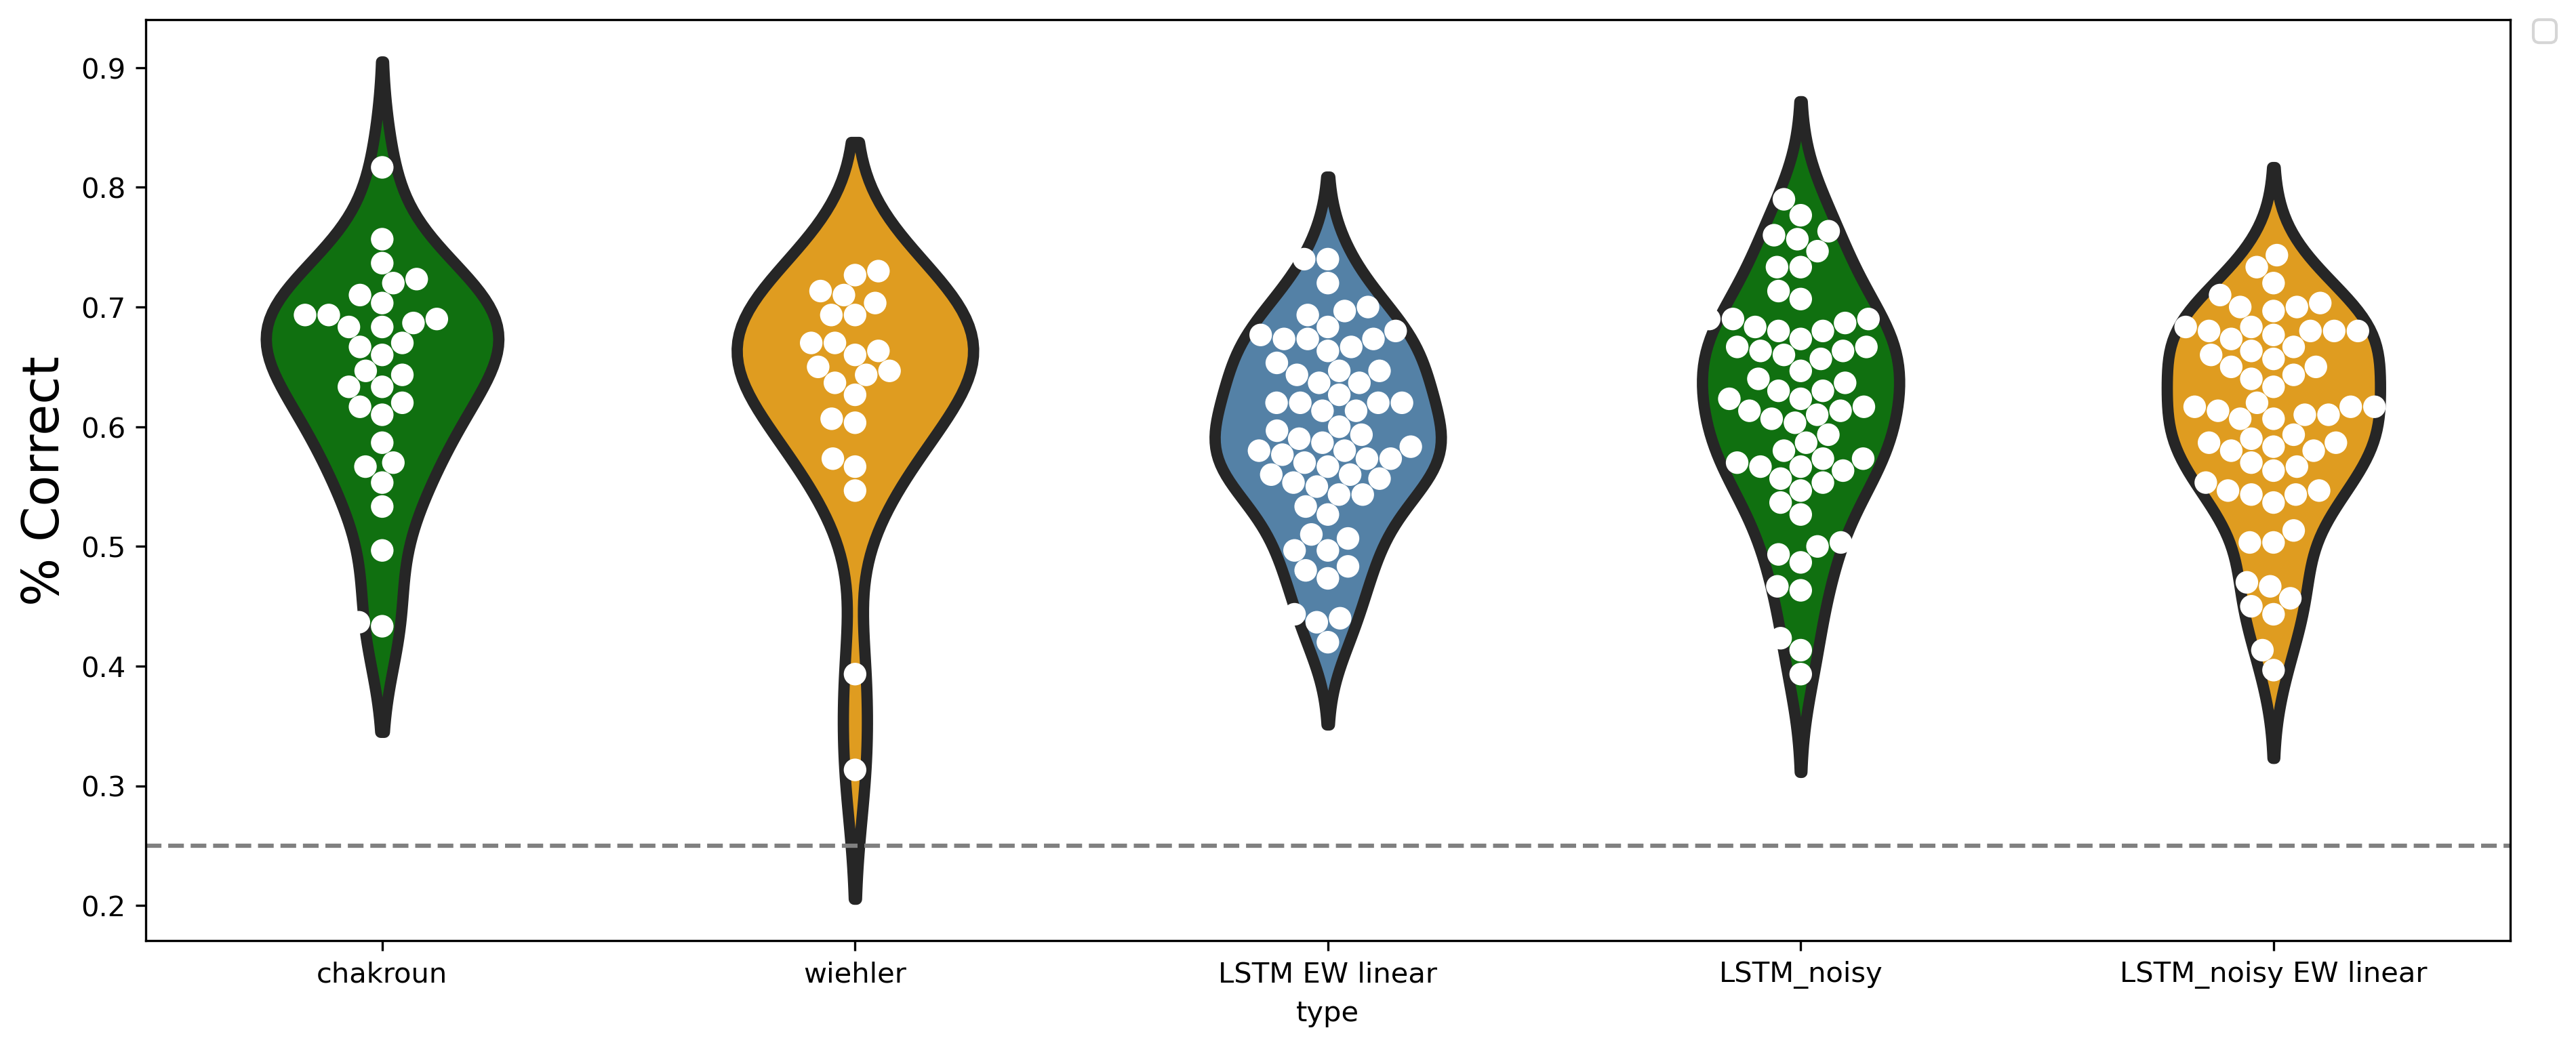

In [10]:
plt.figure(figsize=(15,6), dpi=300)

ax = sns.violinplot(y='perc_corr', x='type', #hue='condition',
                    data=plot_df, inner=None, width=0.5, linewidth = 4, palette = ['green', 'orange', 'steelblue'])
ax = sns.swarmplot(y='perc_corr', x='type', #hue='condition',
                    data=plot_df, color="white", edgecolor="gray", dodge = 'true', size = 8 )

# plt.title('Comparison Human to LSTM Performance')
plt.ylabel('% Correct', fontsize=18)
# plt.xlabel('Daw 4-Armed Restless Bandit Instance')


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.axhline(y=1/4, color='grey', linestyle='--')

# medians = plot_df.groupby(['type']).median()
# medians = medians.iloc[[4,2,3,1,0,9,7,8,6,5,14,12,13,11,10],:]
# medians = medians.to_numpy().flatten()


plt.savefig('noisy_lstm_comparison_14_instances')
plt.show()
